In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc, font_manager
rc('font', family='NanumSquareR')

# 아파트 실거래가 예측 #

In [3]:
train = pd.read_csv('./apt train.csv')

In [4]:
test = pd.read_csv('./apt test.csv')

In [5]:
train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
transaction_id            1216553 non-null int64
apartment_id              1216553 non-null int64
city                      1216553 non-null object
dong                      1216553 non-null object
jibun                     1216553 non-null object
apt                       1216553 non-null object
addr_kr                   1216553 non-null object
exclusive_use_area        1216553 non-null float64
year_of_completion        1216553 non-null int64
transaction_year_month    1216553 non-null int64
transaction_date          1216553 non-null object
floor                     1216553 non-null int64
transaction_real_price    1216553 non-null int64
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ MB


### 유용하다고 생각되는 컬럼들만 추출 ###

In [7]:
df=train[['city','exclusive_use_area','year_of_completion','transaction_year_month','floor','transaction_real_price']]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 6 columns):
city                      1216553 non-null object
exclusive_use_area        1216553 non-null float64
year_of_completion        1216553 non-null int64
transaction_year_month    1216553 non-null int64
floor                     1216553 non-null int64
transaction_real_price    1216553 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 55.7+ MB


## Random Forest ##

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
df.columns

Index(['city', 'exclusive_use_area', 'year_of_completion',
       'transaction_year_month', 'floor', 'transaction_real_price'],
      dtype='object')

In [9]:
df['city'] = pd.get_dummies(df['city'])
#city가 string이므로 더미변수를 만들어서 랜덤포레스트에 적용해야한다

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df['transaction_year_month']=df['transaction_year_month'].astype(str)

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
a= df.assign(year = df['transaction_year_month'].str.slice(0, 4) )
#년도말 추출 

In [30]:
a['exclusive_use_area']=a['exclusive_use_area'].astype(int)

In [32]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 6 columns):
city                      1216553 non-null uint8
exclusive_use_area        1216553 non-null int64
year_of_completion        1216553 non-null int64
floor                     1216553 non-null int64
transaction_real_price    1216553 non-null int64
year                      1216553 non-null int64
dtypes: int64(5), uint8(1)
memory usage: 47.6 MB


In [21]:
df.head()

,city,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price
0,0,84.82,2002,200801,2,37500
1,0,99.17,1973,200801,6,20000
2,0,84.74,2007,200801,6,38500
3,0,146.39,2003,200801,15,118000
4,0,194.43,2004,200801,3,120000


In [12]:
a['year']=a['year'].astype(int)
a=a.drop('transaction_year_month',axis=1)
#기존의 년월이 포함된컬럼삭제

In [33]:
y=a['transaction_real_price']
X=a.drop('transaction_real_price', axis=1)

In [15]:
X.isnull().sum()

city                  0
exclusive_use_area    0
year_of_completion    0
floor                 0
year                  0
dtype: int64

In [16]:
y.isnull().sum()

0

In [38]:
X['floor']

0           2
1           6
2           6
3          15
4           3
           ..
1216548     3
1216549     7
1216550     9
1216551     7
1216552    16
Name: floor, Length: 1216553, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [22]:
rf=RandomForestRegressor(n_estimators=30)
rf.fit(X,y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [23]:
pred=rf.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred)**0.5

4667.183923788115

### 결론 : transaction_real_price의 예측값과 실제값의 차이는 대략 4667정도 차이가 나는것을 알 수 있다 
#### n_stimator를 올리면 예측값과 실제값의 차이는 줄어든다

가중치 : 건축년도

In [47]:
rf1=RandomForestRegressor(n_estimators=30)
rf1.fit(X,y,sample_weight=train['year_of_completion'])
#밑에서 오류가 나는 이유가 가중치를 두번줘서 그런건가


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [48]:
pred1=rf1.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred1)**0.5

9839.46046711252

가중치 : 아파트의 층 

In [35]:
rf2=RandomForestRegressor(n_estimators=30)
rf2.fit(X,y,sample_weight=train['floor'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [78]:
fl=X_test['floor']

In [28]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304139 entries, 1098039 to 978918
Data columns (total 5 columns):
city                  304139 non-null uint8
exclusive_use_area    304139 non-null float64
year_of_completion    304139 non-null int64
floor                 304139 non-null int64
year                  304139 non-null int64
dtypes: float64(1), int64(3), uint8(1)
memory usage: 11.9 MB


In [36]:
pred2=rf2.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred2,sample_weight=train['floor'])**0.5

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:397: RuntimeWarning: invalid value encountered in add
  out[0] += prediction
/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [84]:
fl.isnull().sum()

0

In [1]:
fl.dtypes()

NameError: name 'fl' is not defined

In [38]:
df['transaction_year_month'].unique()

array([200801, 200802, 200803, 200804, 200805, 200806, 200807, 200808,
       200809, 200810, 200811, 200812, 200901, 200902, 200903, 200904,
       200905, 200906, 200907, 200908, 200909, 200910, 200911, 200912,
       201001, 201002, 201003, 201004, 201005, 201006, 201007, 201008,
       201009, 201010, 201011, 201012, 201101, 201102, 201103, 201104,
       201105, 201106, 201107, 201108, 201109, 201110, 201111, 201112,
       201201, 201202, 201203, 201204, 201205, 201206, 201207, 201208,
       201209, 201210, 201211, 201212, 201301, 201302, 201303, 201304,
       201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312,
       201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408,
       201409, 201410, 201411, 201412, 201501, 201502, 201503, 201504,
       201505, 201506, 201507, 201508, 201509, 201510, 201511, 201512,
       201601, 201602, 201603, 201604, 201605, 201606, 201607, 201608,
       201609, 201610, 201611, 201612, 201701, 201702, 201703, 201704,
      

In [40]:
df

,city,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price
0,0,84.8200,2002,200801,2,37500
1,0,99.1700,1973,200801,6,20000
2,0,84.7400,2007,200801,6,38500
3,0,146.3900,2003,200801,15,118000
4,0,194.4300,2004,200801,3,120000
...,...,...,...,...,...,...
1216548,1,59.8245,2012,201711,3,22000
1216549,1,84.9923,2012,201711,7,30750
1216550,1,84.9923,2012,201711,9,29500
1216551,1,101.7400,2008,201711,7,26700


In [33]:
a

,city,exclusive_use_area,year_of_completion,floor,transaction_real_price,year
0,0,84.8200,2002,2,37500,2008
1,0,99.1700,1973,6,20000,2008
2,0,84.7400,2007,6,38500,2008
3,0,146.3900,2003,15,118000,2008
4,0,194.4300,2004,3,120000,2008
...,...,...,...,...,...,...
1216548,1,59.8245,2012,3,22000,2017
1216549,1,84.9923,2012,7,30750,2017
1216550,1,84.9923,2012,9,29500,2017
1216551,1,101.7400,2008,7,26700,2017


In [34]:
a.isnull().sum()

city                      0
exclusive_use_area        0
year_of_completion        0
floor                     0
transaction_real_price    0
year                      0
dtype: int64

In [42]:
a.columns

Index(['city', 'exclusive_use_area', 'year_of_completion', 'floor',
       'transaction_real_price', 'year'],
      dtype='object')

In [48]:
a.corr()

,city,exclusive_use_area,year_of_completion,floor,transaction_real_price,year
city,1.000000,0.011104,0.033627,0.101225,-0.440886,-0.126001
exclusive_use_area,0.011104,1.000000,0.168540,0.134716,0.561563,0.018788
year_of_completion,0.033627,0.168540,1.000000,0.243510,0.052656,0.092627
floor,0.101225,0.134716,0.243510,1.000000,0.112278,0.013288
transaction_real_price,-0.440886,0.561563,0.052656,0.112278,1.000000,0.183714
year,-0.126001,0.018788,0.092627,0.013288,0.183714,1.000000


findfont: Font family ['NanumSquareR'] not found. Falling back to DejaVu Sans.


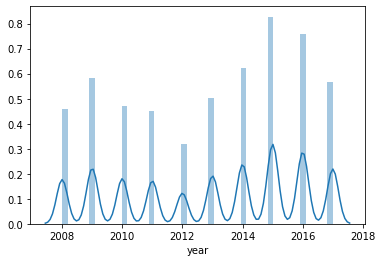

In [49]:
sns.distplot(a['year'])

In [61]:
X=a[['city','exclusive_use_area','year_of_completion','floor','year']]
y=a['transaction_real_price']

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [70]:
import lightgbm as lgb
param = {'num_leaves' : 100, 
         'min_data_in_leaf' : 30,
         'objective' : 'regression', # 모델의 목적 
         'max_depth' : 6,
         'learning_rate' : 0.02,
         'boosting' : 'gbdt',
         'feature_fraction' : 0.7522,
         'bagging_freq' : 1,
         'bagging_fraction' : 0.7083,
         'bagging_seed' : 11,
         'metric' : 'rmse', #평가지표 : rmse
         'random_state': 2019} 

trn_data = lgb.Dataset(X_train, label=y_train)
num_round = 2000

clf = lgb.train(param, trn_data, num_round, valid_sets=[trn_data], verbose_eval=500, early_stopping_rounds = 200)

Training until validation scores don't improve for 200 rounds
[500]	training's rmse: 14466.3
[1000]	training's rmse: 13856.7
[1500]	training's rmse: 13466.1
[2000]	training's rmse: 13192.5
Did not meet early stopping. Best iteration is:
[2000]	training's rmse: 13192.5


In [71]:
predictions = clf.predict(X_test, num_iteration=clf.best_iteration)

In [72]:
predictions

array([31165.19063432, 25773.40159476, 18668.63800161, ...,
       83946.94156208, 29461.69379043,  6945.07951159])

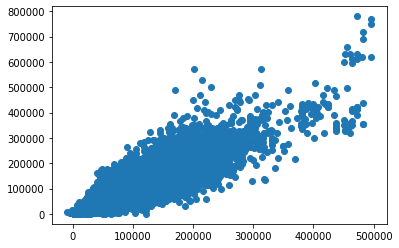

In [73]:
plt.scatter(predictions,y_test)

In [76]:
predictions

array([31165.19063432, 25773.40159476, 18668.63800161, ...,
       83946.94156208, 29461.69379043,  6945.07951159])

In [80]:
predictions.mean()

38196.54566549615

In [81]:
y_test.mean()

38152.86855761907

In [82]:
diff=y_test-predictions

In [83]:
diff

791422       634.809366
1061666      226.598405
740625      4331.361998
539344     13600.646740
1116810    -6756.970146
               ...     
655139      1652.006904
782775     -2532.644916
578948    -16946.941562
876996      5738.306210
737122      1054.920488
Name: transaction_real_price, Length: 364966, dtype: float64

In [86]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(y_test, predictions)**0.5

In [87]:
RMSE
#모델을 잘못사용하고 있다는 결론

13362.821719164067